In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

# Code for real time tentative

In [ ]:
# Video Capture 
capture = cv2.VideoCapture(0)
#capture = cv2.VideoCapture("/home/francesco/ea979/pedestrian")


# Keeps track of what frame we're on
frameCount = 0
Frame=[]
nframes=20
while(1):
    # Return Value and the current frame
    ret, frame = capture.read()

    #  Check if a current frame actually exist
    if not ret:
        break

    frameCount += 1
    # Resize the frame
    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resizedFrame = cv2.resize(grayFrame, (0, 0), fx=1.5, fy=1.50)
    
    dim=np.shape(resizedFrame)
    high=dim[0]
    lenght=dim[1]
    
    # Create an array in which I keep track of previous frames. Those frames will be used to estimate the background 
    # ongoing. This means tha I use just a limited amount of frames before the one that I'm plotting to estimate its
    # background.
    
    Frame.append(resizedFrame)
    
    if frameCount>nframes:
        A=Frame[1:]
        Frame=A
        
    images = np.stack(Frame, axis=2)
    
    # To estimate the background it is possible to do it in many ways. The fastest ones are by calculating the median
    # or the average value of each pixel.
    
    #median=np.median(images,axis=2,keepdims=(high ,lenght))
    avg=np.average(images, axis=2) 
    #image=median[:,:,0]
    
    
    img=(avg-resizedFrame)**2//255
    img_int=img.astype(np.uint8)
    #img_int[img_int<=20]=0
    #img_int[img_int>20]=255
    
    # I put 
    modified_frame=np.where(img_int > 10, resizedFrame, resizedFrame//10)
    
    
    cv2.imshow('Frame', modified_frame)
    #cv2.imshow('median',image)

    time.sleep(0.05)
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

capture.release()
cv2.destroyAllWindows()

# Non real time

In [2]:
# Video Capture 
#capture = cv2.VideoCapture(0)
capture = cv2.VideoCapture("/home/francesco/ea979/pedestrian")


# Keeps track of what frame we're on
frameCount = 0
Frame=[]
new_frames=[]

while(1):
    # Return Value and the current frame
    ret, frame = capture.read()

    #  Check if a current frame actually exist
    if not ret:
        break

    frameCount += 1
    # Resize the frame
    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resizedFrame = cv2.resize(grayFrame, (0, 0), fx=1.5, fy=1.50)
    
    # Create an array in which I keep track of previous frames
    Frame.append(resizedFrame)
   
    #print(frameCount)
    
capture.release()
cv2.destroyAllWindows()

images = np.stack(Frame, axis=2)

dim=np.shape(images[1])
high=dim[0]
lenght=dim[1]

median=np.median(images,axis=2,keepdims=(high ,lenght))
background_median=median[:,:,0]  #It's an estimate of the background through median estimate

avg=np.average(images, axis=2)    #It's an estimate of the backgrount through average



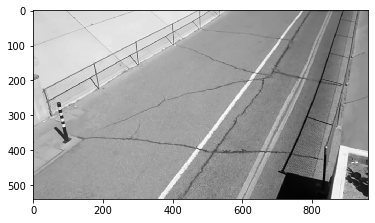

In [3]:
plt.imshow(background_median,cmap='gray')

In [5]:
l=len(Frame)
zeros=np.zeros((high,lenght), dtype=int )
Frame_median=[zeros]*l
Frame_avg=[zeros]*l

for i in range(l):
    
    img = Frame[i]
    
    image_median_filter = (img - background_median)**2//255
    new_frame_median_filter = np.where(image_median_filter > 10, 1, 0) #I have filtered the frames subtracting the background
    
    #image_avg_filter = (img - avg)**2//255
    #new_frame_avg_filter = np.where(image_avg_filter > 2, img, 0)
    
    Frame_median[i] = new_frame_median_filter
    #Frame_avg[i] = image_avg_filter
    
    #cv2.imshow('Frame', image_median_filter)
    
    
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

cv2.destroyAllWindows()
    


In [6]:
l=len(Frame_median)
for i in range(l):
    
    img = Frame_median[i].astype(np.uint8)*255
    #img = Frame_avg[i]
    
    cv2.imshow('Frame', img)
    
    time.sleep(0.02)

    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

cv2.destroyAllWindows()

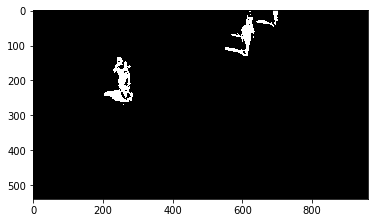

In [7]:
image=Frame_median[500]
img_int=image.astype(np.uint8)*255
plt.imshow(img_int,cmap='gray')

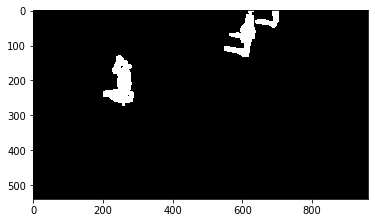

In [9]:
Expanded_shape=cv2.dilate(img_int, None, iterations=3) 
plt.imshow(Expanded_shape,cmap='gray')

In [10]:
shape, _ = cv2.findContours( Expanded_shape, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

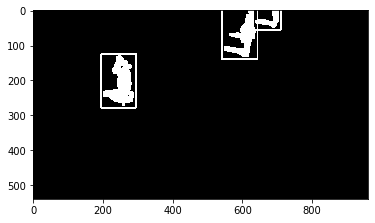

In [12]:
for i in shape:
            (x1, y1, x2, y2) = cv2.boundingRect(i)
        
            if cv2.contourArea(i) < 900:         # Here I can decide what's the max area of a white shape
                continue
            
            cv2.rectangle(Expanded_shape, (x1-5, y1-5), (x1+x2+5, y1+y2+5), 255, 3)
            
            # I plot a rectangle about the white area. I increase the dimention of it by 5 pixels per 
            # direction, to have some margin about the human figure. In this case the width of the square is 3 pixels,
            # but I will eventually set it at -1 to have the square filled in white.
            
            

plt.imshow(Expanded_shape,cmap="gray")

#  All together

In [16]:
l=len(Frame_median)

zeros=np.zeros((high,lenght), dtype=int )
Frame_with_square=[zeros]*l

for i in range(l):
    
    image=Frame_median[i]
    img_int=image.astype(np.uint8)*255
    
    Expanded_shape=cv2.dilate(img_int, None, iterations=3) 
    shape, _ = cv2.findContours( Expanded_shape, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    
    for j in shape:
            (x1, y1, x2, y2) = cv2.boundingRect(j)
        
            if cv2.contourArea(j) < 900:         # Here I can decide what's the max area of a white shape
                continue
            
            cv2.rectangle(Expanded_shape, (x1-5, y1-5), (x1+x2+5, y1+y2+5), 255, 3)
            
    Frame_with_square[i]=Expanded_shape        
            

    

zeros=np.zeros((high,lenght), dtype=int )
Final_modified_video=[zeros]*l

for i in range(l):
    
    img = Frame_with_square[i]
    image = Frame[i]
    #img = Frame_avg[i]
    new_frame = np.where(img > 2, image, 0)
    Final_modified_video[i] = new_frame

    

cv2.destroyAllWindows()



In [19]:

for i in range(l):
    
    img = Final_modified_video[i]
    #img = Frame_avg[i]
    cv2.imshow('Frame', img)
    
    time.sleep(0.02)

    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

cv2.destroyAllWindows()